# 연속데이터예측_아이오와에임스지역_집값예측_train

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [5]:
data = pd.read_csv('./data/house_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# data.info()

### 결측치 처리 

In [7]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Condition2        0.000000
BldgType          0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Condition1        0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
LotArea           0.000000
MSSubClass        0.000000
MSZoning          0.000000
Id                0.000000
Utilities         0.000000
HouseStyle        0.000000
Foundation        0.000000
ExterQual         0.000000
ExterCond         0.000000
B

In [8]:
# 결측치가 전체 데이터의 30% 이상인 경우 컬럼 제거
## Alley(도로접근유형), MasVnrType(외장 벽 마감재 유형), FireplaceQu(벽난로 품질)
## PoolQC(수영장 품질), Fence(울타리 품질), MiscFeature(기타 기능)

data = data.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [9]:
data_isna = (data.isna().sum() / len(data) * 100).sort_values(ascending=False)
missing_cols = data_isna[data_isna > 0].index

In [10]:
missing_cols

Index(['LotFrontage', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical'],
      dtype='object')

In [11]:
for col in missing_cols:
#     print(col, data[col].dtype)
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())


In [12]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

### 이상치 탐지 및 처리

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

<Axes: >

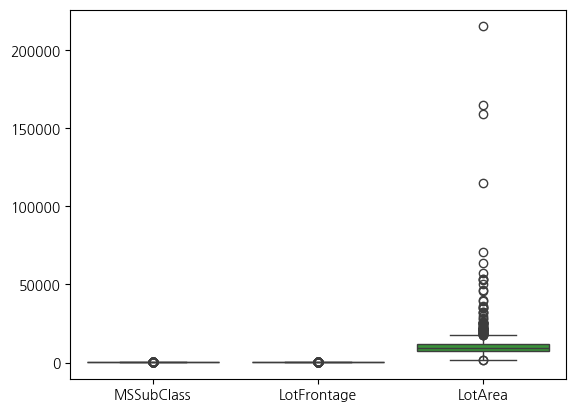

In [13]:
sns.boxplot(data.iloc[:, 1:5])

<Axes: >

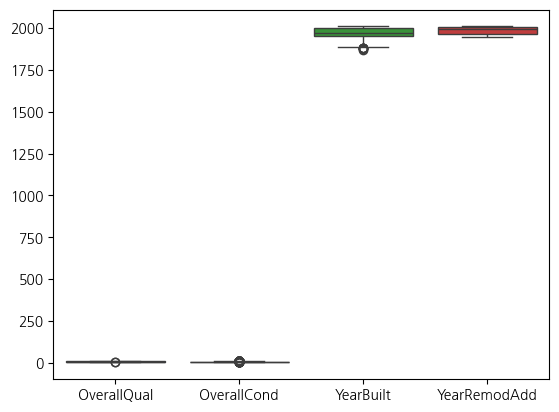

In [14]:
sns.boxplot(data.iloc[:, 11:20])

<Axes: >

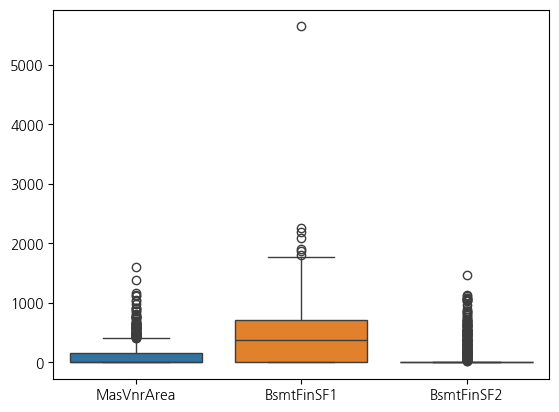

In [15]:
sns.boxplot(data.iloc[:, 20:35])

In [14]:
data2 = data.copy()
data3 = data.copy()

In [15]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [19]:
# 홀드아웃 수행
X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

In [20]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [21]:
X = pd.get_dummies(X)
X = X.astype('float32')

X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
rs = RobustScaler()
rs_X_train = rs.fit_transform(X_train)
rs_X_valid = rs.transform(X_valid)


In [24]:
import joblib

In [25]:
joblib.dump(rs, './model/iowa_rs.joblib')

['./model/iowa_rs.joblib']

## 출력층 : Dense(1)
- model.compile(loss='mean_squared_error', metrics='mse')

In [51]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError

2025-05-22 17:45:06.626022: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 17:45:06.724086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747903506.855385   13366 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747903506.920545   13366 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747903507.047959   13366 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [27]:
inputs = Input(shape=(rs_X_train.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

base_model = Model(inputs=inputs, outputs=outputs)
base_model.summary()

I0000 00:00:1747901069.682474    7647 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 266)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
base_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_path = "./model/iowa_base_model_bast.keras"
check_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)

base_model_history = base_model.fit(rs_X_train, y_train, epochs=1000, batch_size=16,
                                   validation_data=(rs_X_valid, y_valid), callbacks=[early_stop, check_point], verbose=1)


Epoch 1/1000


I0000 00:00:1747901080.180853    7688 service.cc:152] XLA service 0x7f9e90006790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747901080.180930    7688 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-22 17:04:40.281301: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747901080.754837    7688 cuda_dnn.cc:529] Loaded cuDNN version 90300


 4/64 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 38085308416.0000 - root_mean_squared_error: 195079.3906

I0000 00:00:1747901084.259719    7688 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 38138826752.0000 - root_mean_squared_error: 195253.6250
Epoch 1: val_loss improved from inf to 39372173312.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - loss: 38150377472.0000 - root_mean_squared_error: 195283.6406 - val_loss: 39372173312.0000 - val_root_mean_squared_error: 198424.2188
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 39417151488.0000 - root_mean_squared_error: 198484.9688
Epoch 2: val_loss improved from 39372173312.00000 to 39335149568.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 39408762880.0000 - root_mean_squared_error: 198464.5781 - val_loss: 39335149568.0000 - val_root_mean_squared_error: 198330.9062
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 38067318784.0000 - root_mean_squared_error: 195075.6719
Epoch 3: val_loss improved from 39335149568.00000 to 39208173568.00000, sav

Epoch 18/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 28291729408.0000 - root_mean_squared_error: 168160.2344
Epoch 18: val_loss improved from 29673179136.00000 to 29008742400.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 28267780096.0000 - root_mean_squared_error: 168089.8125 - val_loss: 29008742400.0000 - val_root_mean_squared_error: 170319.5312
Epoch 19/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 27067858944.0000 - root_mean_squared_error: 164506.0156
Epoch 19: val_loss improved from 29008742400.00000 to 28414406656.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 27065706496.0000 - root_mean_squared_error: 164499.7344 - val_loss: 28414406656.0000 - val_root_mean_squared_error: 168565.7344
Epoch 20/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 26501484544.0000 - root_mean_squared_error: 162718.5781
Epoch 20: val_loss improved from 28414406656.0

Epoch 35/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 18141171712.0000 - root_mean_squared_error: 134661.5938
Epoch 35: val_loss improved from 17978796032.00000 to 17279875072.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 18129934336.0000 - root_mean_squared_error: 134620.5156 - val_loss: 17279875072.0000 - val_root_mean_squared_error: 131452.9375
Epoch 36/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 16744859648.0000 - root_mean_squared_error: 129207.9219
Epoch 36: val_loss improved from 17279875072.00000 to 16596199424.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 16746400768.0000 - root_mean_squared_error: 129216.8516 - val_loss: 16596199424.0000 - val_root_mean_squared_error: 128826.2344
Epoch 37/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17499054080.0000 - root_mean_squared_error: 132213.7031
Epoch 37: val_loss improved from 16596199424.0

Epoch 52/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7179564544.0000 - root_mean_squared_error: 84620.6641
Epoch 52: val_loss improved from 6577233408.00000 to 6129594880.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7175011840.0000 - root_mean_squared_error: 84595.2344 - val_loss: 6129594880.0000 - val_root_mean_squared_error: 78291.7266
Epoch 53/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6338903040.0000 - root_mean_squared_error: 79573.5547
Epoch 53: val_loss improved from 6129594880.00000 to 5656616448.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6340042240.0000 - root_mean_squared_error: 79581.3594 - val_loss: 5656616448.0000 - val_root_mean_squared_error: 75210.4766
Epoch 54/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6977736192.0000 - root_mean_squared_error: 83441.6406
Epoch 54: val_loss improved from 5656616448.00000 to 5301241856.

Epoch 87/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3365165312.0000 - root_mean_squared_error: 57835.6758
Epoch 87: val_loss improved from 1958080128.00000 to 1913286272.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3367199232.0000 - root_mean_squared_error: 57855.7188 - val_loss: 1913286272.0000 - val_root_mean_squared_error: 43741.1250
Epoch 88/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3608023808.0000 - root_mean_squared_error: 59972.5039
Epoch 88: val_loss did not improve from 1913286272.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 3609705472.0000 - root_mean_squared_error: 59987.8477 - val_loss: 1916134528.0000 - val_root_mean_squared_error: 43773.6719
Epoch 89/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3630492928.0000 - root_mean_squared_error: 60135.1289
Epoch 89: val_loss improved from 1913286272.00000 to 1891973632.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━

Epoch 106/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2936157440.0000 - root_mean_squared_error: 54160.6641
Epoch 106: val_loss did not improve from 1770532736.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2938586880.0000 - root_mean_squared_error: 54183.1836 - val_loss: 1786960640.0000 - val_root_mean_squared_error: 42272.4570
Epoch 107/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3517183232.0000 - root_mean_squared_error: 59242.0352
Epoch 107: val_loss did not improve from 1770532736.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3516372736.0000 - root_mean_squared_error: 59236.1562 - val_loss: 1778146432.0000 - val_root_mean_squared_error: 42168.0742
Epoch 108/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3305618944.0000 - root_mean_squared_error: 57436.6602
Epoch 108: val_loss improved from 1770532736.00000 to 1743601792.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3305940224.0000 - 

Epoch 125/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3945008384.0000 - root_mean_squared_error: 62720.5547
Epoch 125: val_loss did not improve from 1674643456.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3937016320.0000 - root_mean_squared_error: 62656.0547 - val_loss: 1684953216.0000 - val_root_mean_squared_error: 41048.1797
Epoch 126/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3386140672.0000 - root_mean_squared_error: 58077.1055
Epoch 126: val_loss did not improve from 1674643456.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3390040320.0000 - root_mean_squared_error: 58113.7969 - val_loss: 1726799744.0000 - val_root_mean_squared_error: 41554.7812
Epoch 127/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3401690112.0000 - root_mean_squared_error: 58135.7148
Epoch 127: val_loss improved from 1674643456.00000 to 1665679616.00000, saving model to ./model/iowa_base_model_bast.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3406476032.0000 - 

In [29]:
pred = base_model.predict(rs_X_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


,pred
0,128316.179688
1,278995.687500
2,87026.414062
3,126415.804688
4,274223.531250
...,...
433,88356.351562
434,116503.359375
435,169094.515625
436,142923.578125


In [30]:
y_valid = pd.DataFrame(y_valid)
y_valid_df = y_valid.reset_index(drop=True)
final_result = y_valid_df.join(pred)
final_result

,SalePrice,pred
0,154500,128316.179688
1,325000,278995.687500
2,115000,87026.414062
3,159000,126415.804688
4,315500,274223.531250
...,...,...
433,139000,88356.351562
434,126175,116503.359375
435,205950,169094.515625
436,110000,142923.578125


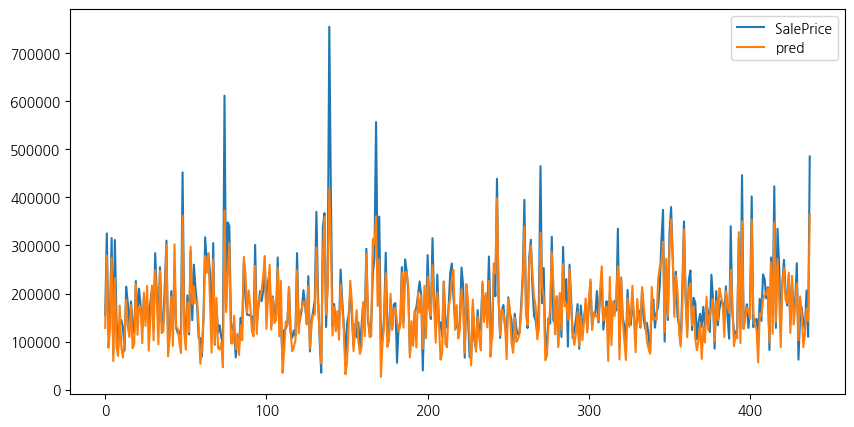

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 1782168320.0000 - root_mean_squared_error: 42083.1055
[1665679488.0, 40812.734375]


In [31]:
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()

print(base_model.evaluate(rs_X_valid, y_valid))


# 많은 컬럼 중에 어떤 컬럼을 선택하는지
- 266개의 컬럼이 존재
- 컬럼의 상관붕석을 통해 타켓 변수(종속변수)와의 상관도가 높은 컬럼만 선택
- 트리계열 알고리즘 사용해 분석 수 중요한 변수만 추출하여 재분석

In [17]:
data2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [18]:
data2 = data2.drop('Id', axis=1)

In [19]:
data2 = pd.get_dummies(data2)
data2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### 상관분석

In [23]:
corr_rate = data2.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

In [27]:
new_cols1 = corr_rate.head(15).index
new_cols1

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd',
       'YearRemodAdd', 'GarageYrBlt', 'Foundation_PConc', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [32]:
new_cols2 = corr_rate.tail(4).index
new_cols2

Index(['KitchenQual_TA', 'BsmtQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'], dtype='object')

In [33]:
final_cols = list(new_cols1) + list(new_cols2)
final_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'YearRemodAdd',
 'GarageYrBlt',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'Fireplaces',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'ExterQual_TA']

In [39]:
final_df = data2[final_cols]

In [40]:
final_df.corr(method='spearman')

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
SalePrice,1.000000,0.809829,0.731310,0.690711,0.652682,0.649379,0.635957,0.602725,0.575408,0.574642,0.571159,0.563256,0.562287,0.532586,0.519247,-0.581803,-0.583512,-0.620915,-0.637785
OverallQual,0.809829,1.000000,0.603262,0.608756,0.647392,0.541552,0.576372,0.459915,0.408730,0.603276,0.557723,0.592010,0.586764,0.427806,0.420626,-0.581192,-0.590344,-0.556712,-0.673842
GrLivArea,0.731310,0.603262,1.000000,0.505094,0.288493,0.468211,0.658419,0.371026,0.494421,0.358133,0.282400,0.274625,0.332373,0.827874,0.480804,-0.376159,-0.338674,-0.362334,-0.413922
GarageCars,0.690711,0.608756,0.505094,1.000000,0.601519,0.853317,0.518310,0.455508,0.450580,0.443029,0.456245,0.564786,0.480178,0.386244,0.325520,-0.423255,-0.504415,-0.489950,-0.506121
YearBuilt,0.652682,0.647392,0.288493,0.601519,1.000000,0.528281,0.537420,0.427187,0.293363,0.593575,0.684388,0.845595,0.704001,0.176820,0.174655,-0.512248,-0.700552,-0.632360,-0.644772
GarageArea,0.649379,0.541552,0.468211,0.853317,0.528281,1.000000,0.444459,0.486685,0.489797,0.389859,0.398267,0.540450,0.400205,0.330549,0.264543,-0.393538,-0.413167,-0.449457,-0.453014
FullBath,0.635957,0.576372,0.658419,0.518310,0.537420,0.444459,1.000000,0.328036,0.366891,0.449973,0.431390,0.524892,0.480765,0.558665,0.268548,-0.430333,-0.513693,-0.450629,-0.485598
TotalBsmtSF,0.602725,0.459915,0.371026,0.455508,0.427187,0.486685,0.328036,1.000000,0.829292,0.313044,0.299042,0.319936,0.296406,0.233913,0.325687,-0.307764,-0.317195,-0.385379,-0.383999
1stFlrSF,0.575408,0.408730,0.494421,0.450580,0.293363,0.489797,0.366891,0.829292,1.000000,0.225259,0.240265,0.214327,0.179926,0.361777,0.394883,-0.268281,-0.215559,-0.326525,-0.294636
ExterQual_Gd,0.574642,0.603276,0.358133,0.443029,0.593575,0.389859,0.449973,0.313044,0.225259,1.000000,0.532550,0.569570,0.586748,0.212665,0.181413,-0.617598,-0.541969,-0.483784,-0.906121


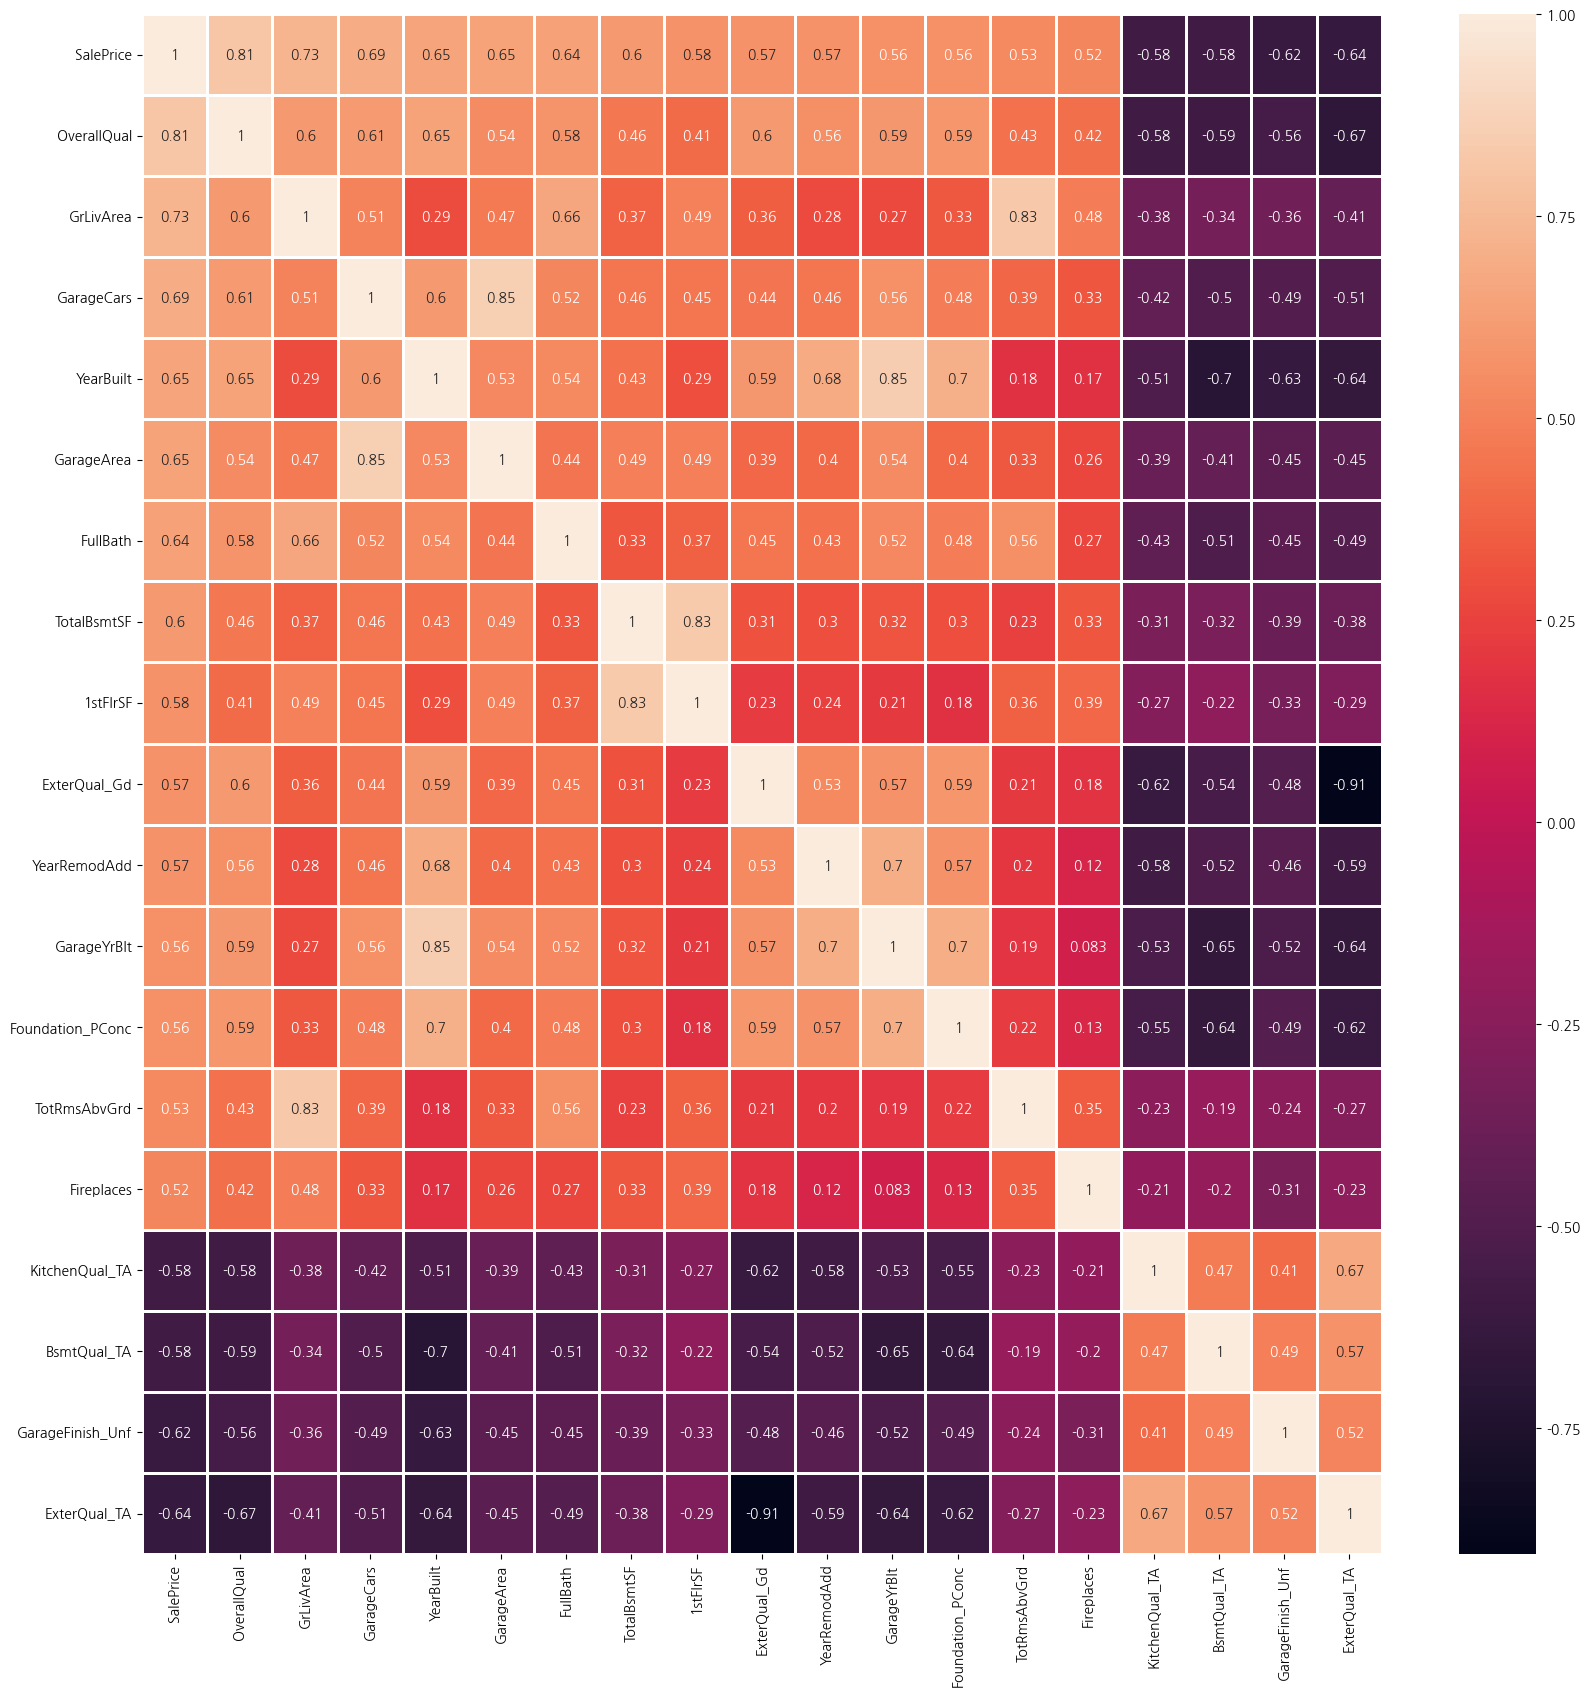

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(method='spearman'), annot=True, linewidths=1)
plt.show()

- ExterQual_TA - ExterQual_Gd : -0.91
- BsmtQual_TA - YearBuilt : -0.7
- GarageYrBlt -  YearBuilt : 0.85
- TotRmsAbvGrds - GrLivArea : 0.83

In [42]:
final_df = final_df.drop(['ExterQual_Gd', 'BsmtQual_TA', 'TotRmsAbvGrd'], axis=1)

In [44]:
X2 = final_df.drop('SalePrice', axis=1)
y2 = final_df['SalePrice']

In [45]:
X2

,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,YearRemodAdd,GarageYrBlt,Foundation_PConc,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,7,1710,2,2003,548,2,856,856,2003,2003.0,True,0,False,False,False
1,6,1262,2,1976,460,2,1262,1262,1976,1976.0,False,1,True,False,True
2,7,1786,2,2001,608,2,920,920,2002,2001.0,True,1,False,False,False
3,7,1717,3,1915,642,1,756,961,1970,1998.0,False,1,False,True,True
4,8,2198,3,2000,836,2,1145,1145,2000,2000.0,True,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,1999,460,2,953,953,2000,1999.0,True,1,True,False,True
1456,6,2073,2,1978,500,2,1542,2073,1988,1978.0,False,2,True,True,True
1457,7,2340,1,1941,252,2,1152,1188,2006,1941.0,False,2,False,False,False
1458,5,1078,1,1950,240,1,1078,1078,1996,1950.0,False,0,False,True,True


In [46]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [47]:
rs2 = RobustScaler()
rs2_X2_train = rs2.fit_transform(X2_train)
rs2_X2_valid = rs2.transform(X2_valid)


In [49]:
rs2_X2_train = rs2_X2_train.astype('float32')
rs2_X2_valid = rs2_X2_valid.astype('float32')

In [52]:
inputs = Input(shape=(rs2_X2_train.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

corr_select_model = Model(inputs=inputs, outputs=outputs)
corr_select_model.summary()

I0000 00:00:1747903523.582316   13366 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
corr_select_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_path = "./model/iowa_cnn_select_model_bast.keras"
check_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)

cnn_select_model_history = corr_select_model.fit(rs2_X2_train, y2_train, epochs=1000, batch_size=64,
                                   validation_data=(rs2_X2_valid, y2_valid), callbacks=[early_stop, check_point], verbose=1)

Epoch 1/1000


I0000 00:00:1747903604.258741   13436 service.cc:152] XLA service 0x7efb540053b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747903604.259270   13436 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-22 17:46:44.476213: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747903605.432712   13436 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 35415355392.0000 - root_mean_squared_error: 188181.6406

I0000 00:00:1747903611.150981   13436 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 38085107712.0000 - root_mean_squared_error: 195124.2031
Epoch 1: val_loss improved from inf to 39380705280.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 517ms/step - loss: 38109585408.0000 - root_mean_squared_error: 195187.5000 - val_loss: 39380705280.0000 - val_root_mean_squared_error: 198445.7188
Epoch 2/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 39093174272.0000 - root_mean_squared_error: 197682.1250
Epoch 2: val_loss improved from 39380705280.00000 to 39380258816.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 39081013248.0000 - root_mean_squared_error: 197653.6250 - val_loss: 39380258816.0000 - val_root_mean_squared_error: 198444.5938
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 39522627584.0000 - root_mean_squared_error: 198748.5000
Epoch 3: val_loss improved from 39380258816.00000 to 3937940684

Epoch 18/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 39209930752.0000 - root_mean_squared_error: 197918.9844
Epoch 18: val_loss improved from 39048556544.00000 to 38983405568.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 39189553152.0000 - root_mean_squared_error: 197870.2188 - val_loss: 38983405568.0000 - val_root_mean_squared_error: 197442.1562
Epoch 19/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 37866696704.0000 - root_mean_squared_error: 194576.3594
Epoch 19: val_loss improved from 38983405568.00000 to 38910722048.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 37884735488.0000 - root_mean_squared_error: 194623.0469 - val_loss: 38910722048.0000 - val_root_mean_squared_error: 197258.0000
Epoch 20/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 38451474432.0000 - root_mean_squared_error: 196045.0469
Epoch 20: val_loss improved from 3

Epoch 35/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 37898166272.0000 - root_mean_squared_error: 194591.1406
Epoch 35: val_loss improved from 36788027392.00000 to 36552540160.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 37847007232.0000 - root_mean_squared_error: 194460.7656 - val_loss: 36552540160.0000 - val_root_mean_squared_error: 191187.1875
Epoch 36/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 37121462272.0000 - root_mean_squared_error: 192606.4688
Epoch 36: val_loss improved from 36552540160.00000 to 36315545600.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 37052948480.0000 - root_mean_squared_error: 192431.0938 - val_loss: 36315545600.0000 - val_root_mean_squared_error: 190566.3750
Epoch 37/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 35066851328.0000 - root_mean_squared_error: 187226.3594
Epoch 37: val_loss improved from 3

Epoch 52/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 29723064320.0000 - root_mean_squared_error: 172365.4375
Epoch 52: val_loss improved from 31435823104.00000 to 31023079424.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 29754284032.0000 - root_mean_squared_error: 172456.3750 - val_loss: 31023079424.0000 - val_root_mean_squared_error: 176133.6875
Epoch 53/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 31275462656.0000 - root_mean_squared_error: 176807.1406
Epoch 53: val_loss improved from 31023079424.00000 to 30613776384.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 31225403392.0000 - root_mean_squared_error: 176667.1875 - val_loss: 30613776384.0000 - val_root_mean_squared_error: 174967.9219
Epoch 54/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 29178503168.0000 - root_mean_squared_error: 170801.9062
Epoch 54: val_loss improved from 3

Epoch 69/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 23477893120.0000 - root_mean_squared_error: 153212.4531
Epoch 69: val_loss improved from 23835619328.00000 to 23359451136.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 23467646976.0000 - root_mean_squared_error: 153179.2812 - val_loss: 23359451136.0000 - val_root_mean_squared_error: 152837.9844
Epoch 70/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 22117007360.0000 - root_mean_squared_error: 148694.0000
Epoch 70: val_loss improved from 23359451136.00000 to 22877816832.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 22141620224.0000 - root_mean_squared_error: 148776.7188 - val_loss: 22877816832.0000 - val_root_mean_squared_error: 151254.1406
Epoch 71/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 22549192704.0000 - root_mean_squared_error: 150150.2812
Epoch 71: val_loss improved from 2

Epoch 86/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15462588416.0000 - root_mean_squared_error: 124303.8906
Epoch 86: val_loss improved from 16010855424.00000 to 15600201728.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 15523884032.0000 - root_mean_squared_error: 124549.1719 - val_loss: 15600201728.0000 - val_root_mean_squared_error: 124900.7656
Epoch 87/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14260848640.0000 - root_mean_squared_error: 119378.1641
Epoch 87: val_loss improved from 15600201728.00000 to 15183024128.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 14291855360.0000 - root_mean_squared_error: 119506.9688 - val_loss: 15183024128.0000 - val_root_mean_squared_error: 123219.4141
Epoch 88/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 15369065472.0000 - root_mean_squared_error: 123963.6953
Epoch 88: val_loss improved from 1

Epoch 103/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10525124608.0000 - root_mean_squared_error: 102525.1328
Epoch 103: val_loss improved from 9947453440.00000 to 9666297856.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 10542713856.0000 - root_mean_squared_error: 102611.7344 - val_loss: 9666297856.0000 - val_root_mean_squared_error: 98317.3281
Epoch 104/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 11699563520.0000 - root_mean_squared_error: 108059.9609
Epoch 104: val_loss improved from 9666297856.00000 to 9395197952.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 11663776768.0000 - root_mean_squared_error: 107893.3047 - val_loss: 9395197952.0000 - val_root_mean_squared_error: 96928.8281
Epoch 105/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11315968000.0000 - root_mean_squared_error: 106348.6094
Epoch 105: val_loss improved from 9

Epoch 120/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8247279104.0000 - root_mean_squared_error: 90775.2031
Epoch 120: val_loss improved from 6352731648.00000 to 6209128448.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8251930624.0000 - root_mean_squared_error: 90801.8828 - val_loss: 6209128448.0000 - val_root_mean_squared_error: 78798.0234
Epoch 121/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7894483456.0000 - root_mean_squared_error: 88819.4219
Epoch 121: val_loss improved from 6209128448.00000 to 6049602048.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7866173952.0000 - root_mean_squared_error: 88659.5859 - val_loss: 6049602048.0000 - val_root_mean_squared_error: 77779.1875
Epoch 122/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7665894400.0000 - root_mean_squared_error: 87506.9531
Epoch 122: val_loss improved from 6049602048.00

Epoch 137/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6855942656.0000 - root_mean_squared_error: 82749.1562
Epoch 137: val_loss improved from 4569561600.00000 to 4499305472.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6976950272.0000 - root_mean_squared_error: 83467.4922 - val_loss: 4499305472.0000 - val_root_mean_squared_error: 67076.8594
Epoch 138/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7432677376.0000 - root_mean_squared_error: 86059.3125
Epoch 138: val_loss improved from 4499305472.00000 to 4456311808.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 7424249344.0000 - root_mean_squared_error: 86019.5078 - val_loss: 4456311808.0000 - val_root_mean_squared_error: 66755.6094
Epoch 139/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6638740480.0000 - root_mean_squared_error: 81440.3203
Epoch 139: val_loss improved from 4456311808.00

Epoch 154/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7068195840.0000 - root_mean_squared_error: 84004.4219
Epoch 154: val_loss improved from 3876750080.00000 to 3859801856.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7062137856.0000 - root_mean_squared_error: 83974.4922 - val_loss: 3859801856.0000 - val_root_mean_squared_error: 62127.3047
Epoch 155/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7874291712.0000 - root_mean_squared_error: 88551.3828
Epoch 155: val_loss improved from 3859801856.00000 to 3851723264.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 7860187648.0000 - root_mean_squared_error: 88476.3359 - val_loss: 3851723264.0000 - val_root_mean_squared_error: 62062.2539
Epoch 156/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5987163648.0000 - root_mean_squared_error: 77278.7266
Epoch 156: val_loss improved from 3851723264.00

Epoch 171/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6520074240.0000 - root_mean_squared_error: 80692.4531
Epoch 171: val_loss improved from 3531557632.00000 to 3531159040.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6504937472.0000 - root_mean_squared_error: 80601.1172 - val_loss: 3531159040.0000 - val_root_mean_squared_error: 59423.5547
Epoch 172/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5739063808.0000 - root_mean_squared_error: 75729.8594
Epoch 172: val_loss improved from 3531159040.00000 to 3510795008.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5746160640.0000 - root_mean_squared_error: 75778.9453 - val_loss: 3510795008.0000 - val_root_mean_squared_error: 59251.9609
Epoch 173/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7556889088.0000 - root_mean_squared_error: 86390.3281
Epoch 173: val_loss improved from 3510795008.00

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6049259520.0000 - root_mean_squared_error: 77670.7656
Epoch 188: val_loss improved from 3335061248.00000 to 3329981184.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6037281792.0000 - root_mean_squared_error: 77595.6797 - val_loss: 3329981184.0000 - val_root_mean_squared_error: 57705.9883
Epoch 189/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6811785216.0000 - root_mean_squared_error: 82229.8125
Epoch 189: val_loss did not improve from 3329981184.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6862836736.0000 - root_mean_squared_error: 82571.2344 - val_loss: 3332291584.0000 - val_root_mean_squared_error: 57726.0039
Epoch 190/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5948029440.0000 - root_mean_squared_error: 77035.8203
Epoch 190: val_loss improved from 3329981184.00000 to 3323388416.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/3

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 5487226368.0000 - root_mean_squared_error: 74058.9453 - val_loss: 3205179136.0000 - val_root_mean_squared_error: 56614.3008
Epoch 206/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5457396736.0000 - root_mean_squared_error: 73735.9062
Epoch 206: val_loss did not improve from 3205179136.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 5529388032.0000 - root_mean_squared_error: 74207.5781 - val_loss: 3215531264.0000 - val_root_mean_squared_error: 56705.6562
Epoch 207/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6326876672.0000 - root_mean_squared_error: 79432.4531
Epoch 207: val_loss did not improve from 3205179136.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6301626368.0000 - root_mean_squared_error: 79277.6484 - val_loss: 3215156992.0000 - val_root_mean_squared_error: 56702.3555
Epoch 208/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5617263104.0000 - root_mean_squared_error: 74933.7969
Epoch 208: val_lo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5899393536.0000 - root_mean_squared_error: 76731.4375
Epoch 223: val_loss improved from 3081355264.00000 to 3070124800.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5890659328.0000 - root_mean_squared_error: 76676.1719 - val_loss: 3070124800.0000 - val_root_mean_squared_error: 55408.7070
Epoch 224/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6012411904.0000 - root_mean_squared_error: 77459.0000
Epoch 224: val_loss improved from 3070124800.00000 to 3061681408.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 5998416384.0000 - root_mean_squared_error: 77375.5078 - val_loss: 3061681408.0000 - val_root_mean_squared_error: 55332.4609
Epoch 225/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4432647168.0000 - root_mean_squared_error: 66524.7969
Epoch 225: val_loss improved from 3061681408.00000 to 30456401

Epoch 241/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6116537856.0000 - root_mean_squared_error: 78106.8906
Epoch 241: val_loss improved from 2976161280.00000 to 2970994688.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6139422720.0000 - root_mean_squared_error: 78264.1016 - val_loss: 2970994688.0000 - val_root_mean_squared_error: 54506.8320
Epoch 242/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5421856256.0000 - root_mean_squared_error: 73388.0781
Epoch 242: val_loss improved from 2970994688.00000 to 2969674240.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5466704896.0000 - root_mean_squared_error: 73708.2656 - val_loss: 2969674240.0000 - val_root_mean_squared_error: 54494.7148
Epoch 243/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6030455296.0000 - root_mean_squared_error: 77581.5391
Epoch 243: val_loss did not improve from 296967

Epoch 259/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5684604416.0000 - root_mean_squared_error: 75332.7109
Epoch 259: val_loss improved from 2897752320.00000 to 2884029952.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 5670174720.0000 - root_mean_squared_error: 75236.8516 - val_loss: 2884029952.0000 - val_root_mean_squared_error: 53703.1641
Epoch 260/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5903406592.0000 - root_mean_squared_error: 76787.1719
Epoch 260: val_loss improved from 2884029952.00000 to 2880323840.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5899977216.0000 - root_mean_squared_error: 76766.1562 - val_loss: 2880323840.0000 - val_root_mean_squared_error: 53668.6484
Epoch 261/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4969704448.0000 - root_mean_squared_error: 70446.4609
Epoch 261: val_loss improved from 2880323840.00

Epoch 277/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5395058176.0000 - root_mean_squared_error: 73386.6250
Epoch 277: val_loss improved from 2798836480.00000 to 2796999936.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5412598784.0000 - root_mean_squared_error: 73515.1406 - val_loss: 2796999936.0000 - val_root_mean_squared_error: 52886.6680
Epoch 278/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5593490432.0000 - root_mean_squared_error: 74705.5000
Epoch 278: val_loss improved from 2796999936.00000 to 2776596224.00000, saving model to ./model/iowa_cnn_select_model_bast.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5598007296.0000 - root_mean_squared_error: 74738.0547 - val_loss: 2776596224.0000 - val_root_mean_squared_error: 52693.4180
Epoch 279/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5290716160.0000 - root_mean_squared_error: 72692.7344
Epoch 279: val_loss did not improve from 277659

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5558895616.0000 - root_mean_squared_error: 74500.9297 - val_loss: 2719001600.0000 - val_root_mean_squared_error: 52144.0469
Epoch 296/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5952767488.0000 - root_mean_squared_error: 76721.9531
Epoch 296: val_loss did not improve from 2719001600.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5928580608.0000 - root_mean_squared_error: 76602.7031 - val_loss: 2735260672.0000 - val_root_mean_squared_error: 52299.7188
Epoch 297/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6327723008.0000 - root_mean_squared_error: 79419.3438
Epoch 297: val_loss did not improve from 2719001600.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6271570944.0000 - root_mean_squared_error: 79075.1484 - val_loss: 2736627712.0000 - val_root_mean_squared_error: 52312.7891
Epoch 298/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4216663808.0000 - root_mean_squared_error: 64771.1016
Epoch 298: val_lo

Epoch 314/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4665139712.0000 - root_mean_squared_error: 68178.8750
Epoch 314: val_loss did not improve from 2659624704.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4696064512.0000 - root_mean_squared_error: 68406.8359 - val_loss: 2680372736.0000 - val_root_mean_squared_error: 51772.3164
Epoch 315/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5750535680.0000 - root_mean_squared_error: 75663.1484
Epoch 315: val_loss did not improve from 2659624704.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5695815168.0000 - root_mean_squared_error: 75314.9062 - val_loss: 2677804800.0000 - val_root_mean_squared_error: 51747.5117
Epoch 316/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5080015360.0000 - root_mean_squared_error: 71212.5391
Epoch 316: val_loss did not improve from 2659624704.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5095984640.0000 - root_mean_squared_error: 71326.8906 - val_loss: 2682903296.0000 -

In [55]:
pred2 = corr_select_model.predict(rs2_X2_valid)
pred2 = pd.DataFrame(pred2, columns=['pred'])
pred2

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


,pred
0,69178.531250
1,290266.843750
2,101997.343750
3,109890.390625
4,280010.437500
...,...
433,65219.332031
434,67761.179688
435,192176.078125
436,120869.890625


In [56]:
y2_valid = pd.DataFrame(y2_valid)
y2_valid_df = y2_valid.reset_index(drop=True)
final_result2 = y2_valid_df.join(pred2)
final_result2

,SalePrice,pred
0,154500,69178.531250
1,325000,290266.843750
2,115000,101997.343750
3,159000,109890.390625
4,315500,280010.437500
...,...,...
433,139000,65219.332031
434,126175,67761.179688
435,205950,192176.078125
436,110000,120869.890625


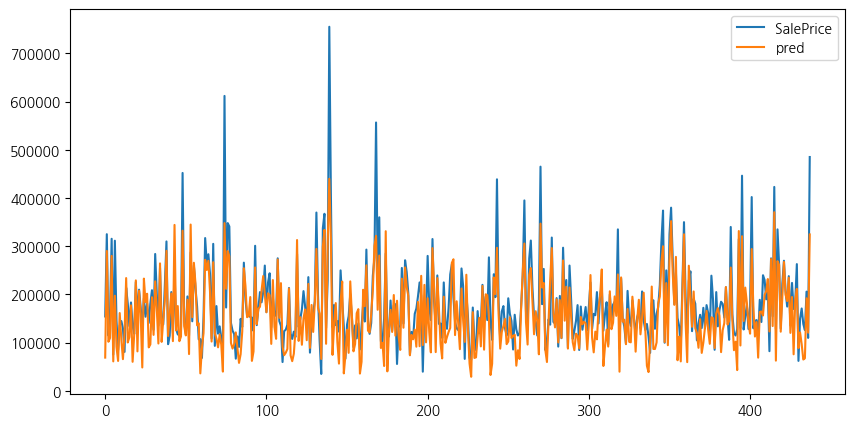

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2710388736.0000 - root_mean_squared_error: 51981.4297
[2659624704.0, 51571.55078125]


In [57]:
plt.figure(figsize=(10,5))
plt.plot(final_result2['SalePrice'], label='SalePrice')
plt.plot(final_result2['pred'], label='pred')
plt.legend()
plt.show()

print(corr_select_model.evaluate(rs2_X2_valid, y2_valid))